<a href="https://colab.research.google.com/github/Sreemaee21/Projects/blob/main/Neural_Networks_Cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Foundations of Modern Machine Learning**
## Lab 15 Project
### Lab Coordinator : Vinay Kumar

## **Overview**
In this project we'll try to implement forward propogation and backward propogation in neural networks. The project consists of two parts

*   Writing the functions for forward and backward propogation for different activation functions
*   Using the functions implemented to train and test a real world dataset.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from google.colab import files

## Implementing the neural network

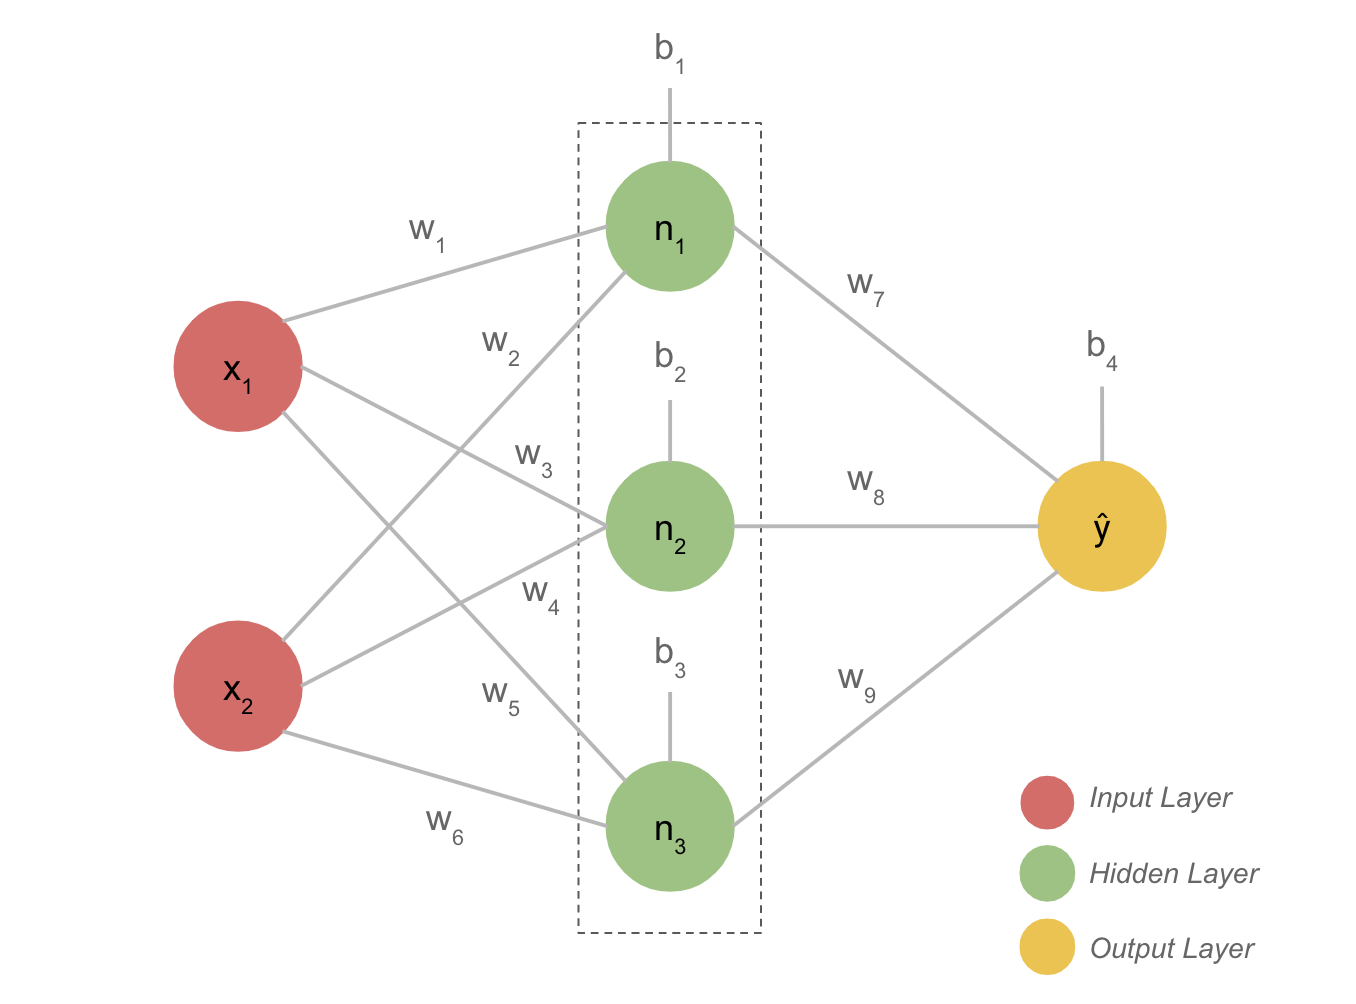

We'll implement a custom neural network with custom number of layers with custom sizes. Before going ahead with implementing forward propogation, there is one important task left. That is, defining the activation functions.

### Activation functions

There are many different activation functions that can be used for neural networks but the most popular ones are:

*   Sigmoid
*   Tanh
*   ReLu

Let us implement these activation functions first

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(x):
    return  (1-np.exp(-2*x))/(1+np.exp(-2*x))

def reLu(x):
    return np.maximum(0,x)

Visualising the activation functions

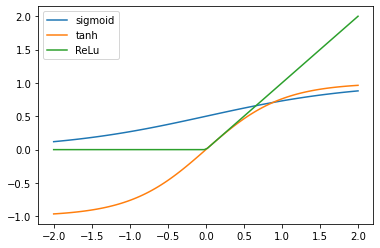

In [ ]:
Y = np.linspace(-2,2,100)
for activation in [(sigmoid, 'sigmoid'), (tanh,'tanh'), (reLu, 'ReLu')]:
    plt.plot(Y, activation[0](Y), label=activation[1])
plt.legend()
plt.show()

### Forward Propogation

In [ ]:
def forward(X, W, b, activation):
    '''
        X is the input to the neural network
        W are the weights of the neural network
        b are the biases of the neural network
        activation is the activation function for hidden layers
    '''
    num_layers = len(W)
    A = X
    caches = []

    #Hidden layers
    for layer in range(0,num_layers-1):
        A_prev = A
        Z = np.dot(W[layer], A_prev) + b[layer]                             # Multipying the input with weights to obtain Z
        A = activation(Z)                                                   # Applying activation function on Z
        caches.append([(A_prev, W[layer], b[layer]), Z])
    
    # Output layer
    A_prev=A
    Z = np.dot(W[num_layers-1], A_prev) + b[num_layers-1]
    y = sigmoid(Z)                                                          # TODO: Explore why sigmoid function is being used in the last layer
    caches.append([(A_prev, W[num_layers-1], b[num_layers-1]), Z])
    
    return y, caches

### Loss/Error function

Before backward propogation and updating weights, we need to find the error in the value predicted by the model using forward propogation. Again, there are many loss functions which can be used based on the problem. Let's focus on mean squared error and cross-entropy error loss functions

In [ ]:
def MSE_loss(y, Y):
    return np.sum((y-Y)**2)/y.shape[1]

def crossEntropy_loss(y, Y):
    m = Y.shape[1]              
    cost = - (1 / m) * np.sum(
        np.multiply(Y, np.log(y)) + np.multiply(1 - Y, np.log(1 - y)))

    return cost

### Backward propogation
For backward propogation, we need functions to find gradients of the activation functions and the los functions used. So, lets define them first
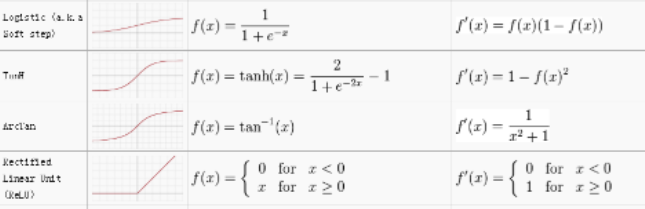

In [ ]:
def sigmoid_grad(x):
    z = sigmoid(x)
    return z*(1-z)

def tanh_grad(x):
    z = tanh(x)
    return 1-z**2

def reLu_grad(x):
    z = reLu(x)
    return np.int64(z>0)

def MSE_grad(y, Y):
    return 2*np.sum(y-Y)/len(Y)

def crossEntropy_grad(y, Y):
    return np.divide(y - Y, np.multiply(y, 1 - y))

We use the following procedure for finding the gradients using back propogation

> 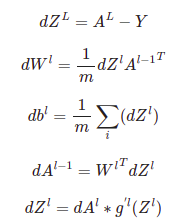

In [ ]:
def backward(y, Y, caches, activation_grad, loss_grad):
    '''
        y is the predicted output by the neural network
        Y is the actual output
        caches are the cache values used for grad
        activation_grad is the gradient for the activation function
        loss_grad is the gradient for the loss function
    '''
    num_layers = len(caches)
    grads = []

    # Gradients for output layer
    dy = loss_grad(y, Y)
    (A_prev, W_cur, b), Z = caches[num_layers-1]
    dZ = dy*sigmoid_grad(x=Z)
    
    dA_prev = np.dot(W_cur.T, dZ)
    db = np.sum(dZ, axis=1, keepdims=True)/A_prev.shape[1]
    dW = np.dot(dZ, A_prev.T)/A_prev.shape[1]
    grads.append((dW, db))

    #Gradients for hidden layers
    for layer in range(num_layers-1, 0, -1):
        (A_prev, W_cur, b), Z = caches[layer-1]
        dZ = dA_prev*activation_grad(x=Z)
        
        dA_prev = np.dot(W_cur.T, dZ)
        db = np.sum(dZ, axis=1, keepdims=True)/A_prev.shape[1]
        dW = np.dot(dZ, A_prev.T)/A_prev.shape[1]
        grads.append((dW, db))
    
    grads = list(reversed(grads))
    return grads

### Updating parameters

Finally, after calculating the gradients using back propogation, we use the values of gradient to update the weights of the neual network.

In [ ]:
def update(W, b, grads, lr):
    num_layers = len(W)
    for layer in range(0,num_layers):
        W[layer] = W[layer] - lr*grads[layer][0]
        b[layer] = b[layer] - lr*grads[layer][1]

    return W, b

### Initializing weights

Now, we have almost coded the neural network from scratch and the last step is to initialize weights. We initialize the weights randomly scaled by a small value.

TODO: Explore what happenes is weights are initialized with zeros or if the weights are not scaled

1) Derivatives will always be the same if weights are initialised at zero.
2) All neurons carry out the same calculation and generate the same result if weights are not scaled.

In [ ]:
def initialize_weights(layers_dims):
    np.random.seed(1)               
    W = []
    b = []
    L = len(layers_dims)        

    for l in range(1, L):           
        W.append(np.random.randn(layers_dims[l], layers_dims[l - 1]) * 0.01)
        b.append(np.zeros((layers_dims[l], 1)))

    return W,b

## Training a real life dataset

Hurray!! We have successfully coded the neural network. Now its time to apply it on a real life dataset. In this project, we use the cat classification dataset. The dataset consists of 209 train images and 50 test images with each image either containing the face of a cat or a random image. We should predict if the face present in the test image is cat or not. The files for training and testing are provied to you. Upload the files to the colab session to use the dataset

In [ ]:
train_file = files.upload()     # Upload 'train_catvnoncat.h5' file here

Saving train_catvnoncat.h5 to train_catvnoncat.h5


In [ ]:
test_file = files.upload()      # Upload 'test_catvnoncat.h5' file here

Saving test_catvnoncat.h5 to test_catvnoncat (1).h5


### Preparing the dataset

Original dimensions:
--------------------
Training: (209, 64, 64, 3), (209,)
Test: (50, 64, 64, 3), (50,)

New dimensions:
---------------
Training: (12288, 209), (1, 209)
Test: (12288, 50), (1, 50)


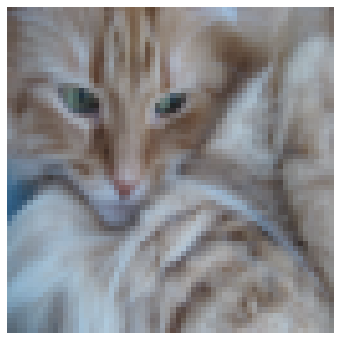

In [ ]:
# Import training dataset
train_dataset = h5py.File("train_catvnoncat.h5")
X_train = np.array(train_dataset["train_set_x"])
y_train = np.array(train_dataset["train_set_y"])

test_dataset = h5py.File("test_catvnoncat.h5")
X_test = np.array(test_dataset["test_set_x"])
y_test = np.array(test_dataset["test_set_y"])

print(f"Original dimensions:\n{20 * '-'}\nTraining: {X_train.shape}, {y_train.shape}\nTest: {X_test.shape}, {y_test.shape}")

# plot cat image
plt.figure(figsize=(6, 6))
plt.imshow(X_train[2])
plt.axis("off");

# Transform input data and label vector
X_train = X_train.reshape(209, -1).T
y_train = y_train.reshape(-1, 209)

X_test = X_test.reshape(50, -1).T
y_test = y_test.reshape(-1, 50)

# standardize the data
X_train = X_train / 255
X_test = X_test / 255

print(f"\nNew dimensions:\n{15 * '-'}\nTraining: {X_train.shape}, {y_train.shape}\nTest: {X_test.shape}, {y_test.shape}")

### Putting it all together

Let us combine all the functions we wrote to prepare a custom model

In [ ]:
def trainCustomModel( X, Y, layers_dims, learning_rate=0.01, num_iterations=3000, print_losses=True, activation=reLu, activation_grad=reLu_grad, loss_function=crossEntropy_loss, loss_grad=crossEntropy_grad):
    
    np.random.seed(1)

    # initialize parameters
    W, b = initialize_weights(layers_dims)

    # intialize losses array
    losses = []

    # iterate over num_iterations
    for i in range(num_iterations):

        # get the prediction of the model by forward propogating all the layers
        y, caches = forward(X, W, b, activation)

        # compute the loss
        loss = loss_function(y, Y)

        # find gradients using backward propogation
        grads = backward(y, Y, caches, activation_grad, loss_grad)

        # update weights using the gradients obtained
        W, b = update(W, b, grads, learning_rate)

        # print losses after every 100th iteration and store it
        if (i + 1) % 100 == 0:
            if print_losses:
                print(f"The loss after {i + 1} iterations is: {loss:.4f}")
            losses.append(loss)

    # plot the loss curve
    plt.plot(losses)
    plt.xlabel("Iterations (per hundreds)")
    plt.ylabel("Loss")
    plt.title(f"Loss curve for the learning rate = {learning_rate}")

    return W, b


def accuracy(X, W, b, y, activation=reLu):
    probs, caches = forward(X, W, b, activation)
    labels = (probs >= 0.5) * 1
    accuracy = np.mean(labels == y) * 100
    return f"The accuracy rate is: {accuracy:.2f}%."


### Training the model and checking the results

Define a custom model with hidden layers sizes using 'layers_dims' and train it using the training code written above. 

The loss after 100 iterations is: 0.2258
The loss after 200 iterations is: 0.2258
The loss after 300 iterations is: 0.2258
The loss after 400 iterations is: 0.2258
The loss after 500 iterations is: 0.2258
The loss after 600 iterations is: 0.2258
The loss after 700 iterations is: 0.2258
The loss after 800 iterations is: 0.2258
The loss after 900 iterations is: 0.2258
The loss after 1000 iterations is: 0.2258
The loss after 1100 iterations is: 0.2258
The loss after 1200 iterations is: 0.2258
The loss after 1300 iterations is: 0.2258
The loss after 1400 iterations is: 0.2258
The loss after 1500 iterations is: 0.2258
The loss after 1600 iterations is: 0.2258
The loss after 1700 iterations is: 0.2258
The loss after 1800 iterations is: 0.2258
The loss after 1900 iterations is: 0.2258
The loss after 2000 iterations is: 0.2258
The loss after 2100 iterations is: 0.2258
The loss after 2200 iterations is: 0.2258
The loss after 2300 iterations is: 0.2258
The loss after 2400 iterations is: 0.2258
T

'The accuracy rate is: 34.00%.'

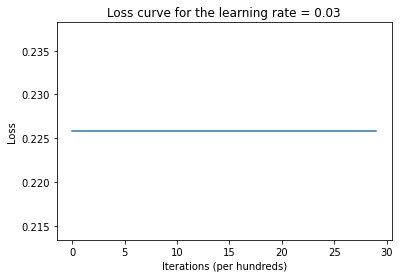

In [ ]:
# Initializing the structure of model with number of hidden layers and sizes of each hidden layer
layers_dims = [X_train.shape[0], 5, 5, 1]

# Training the custom model with parameters
W, b = trainCustomModel(X_train, y_train, layers_dims, learning_rate=0.03, num_iterations=3000, activation = reLu, activation_grad = reLu_grad, loss_function=MSE_loss, loss_grad=MSE_grad)

# Printing the accuracy
accuracy(X_test, W, b, y_test, activation=reLu)

## Observations

1.   Why do you think the loss curve remained flat? Try changing the loss function and loss gradient to cross-entropy. What do you observe? Why do you think MSE loss is not a good loss function for binary classification tasks
2.   Try playing around with different parameters like activation function, learning rates, etc and make observations on the results.
3.   Try changing the model structure by increasing the number of hidden layers and sizes of hidden layers, notice how the models performance changes.
4.   Do you observe overfitting with any of the configurations you have played around with? Try increasing the numeber of training iterations and observe what happens to the test accuracy. How do you think we can avoid the overfitting problem if observed.
5.   You are also encouraged to use the model with different datasets like regressions datasets, etc. What are the ideal parameters for each of the dataset types

